# Value Investor 

### Background:

We are a portfolio investment company and we make investments in the emerging markets around the world. Our company profits by investing in profitable companies, buying, holding and selling company stocks based on value investing principles.

Our goal is to establish a robust intelligent system to aid our value investing efforts using stock market data. We make investment decisions and based on intrinsic value of companies and do not trade on the basis of daily market volatility. Our profit realization strategy typically involves weekly, monthly and quarterly performance of stocks we buy or hold.

### Goal(s):


Predict stock price valuations on a daily, weekly and monthly basis. Recommend BUY, HOLD, SELL decisions. Maximize capital returns, minimize losses. Ideally a loss should never happen. Minimize HOLD period.


### Success Metrics:

Evaluate on the basis of capital returns. Use Bollinger Bands to measure your systems effectiveness.

### Data Description:
An explanation of the variables in the dataset
- Price: the closing price on the trading day
- Open: the price of the stock when it opened
- High: the highest price during the day
- Low: the lowest price during the day
- Vol.: Volume – how many shares were traded
- Changes %: is the percentage of changes between the curent day and the previous day

## Exploratory Data Analysis

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pylab
%matplotlib inline
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from fbprophet import Prophet
import pmdarima as pm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
from statsmodels.tsa.holtwinters import ExponentialSmoothing

from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
# setting the size of the figures displayed
plt.rcParams['figure.figsize'] = (20,8)

import warnings

warnings.filterwarnings("ignore")

In [2]:
# Read the excel sheet
excelfile = pd.ExcelFile("2020Q1Q2Q3Q4-2021Q1.xlsx")

In [3]:
# The number of sheets in excel file and the names of the sheets
print("Excel spreadsheet consists of {} sheets".format(len(excelfile.sheet_names)))
excelfile.sheet_names

Excel spreadsheet consists of 8 sheets


['Russia - Sberbank Rossii PAO (S',
 'Turkey - Koc Holding AS (KCHOL)',
 'Egypt - Medinet Nasr Housing (M',
 'Brazil - Minerva SABrazil (BEEF',
 'Argentina - Pampa Energia SA (P',
 'Colombia - Cementos Argos SA (C',
 'South Africa - Impala Platinum ',
 'South Korea - Dongkuk Steel Mil']

### Russia - Sberbank Rossii PAO (S)

In [4]:
# SberBank DataFrame 
sberbank_df = excelfile.parse(sheet_name=0, index_col=0, parse_dates=['Date'])

In [5]:
# head of the dataset
sberbank_df.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2021-03-31 00:00:00,291.02,294.0,294.42,290.26,47.00M,-0.0076
2021-03-30 00:00:00,293.25,294.86,295.72,291.5,38.81M,-0.0002
2021-03-29 00:00:00,293.3,289.72,294.09,289.26,43.68M,0.0071
2021-03-26 00:00:00,291.22,288.63,292.75,288.32,56.07M,0.0159
2021-03-25 00:00:00,286.66,286.5,287.03,283.85,35.22M,0.0030


In [6]:
# tail of the dataset
sberbank_df.tail()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2020-01-09 00:00:00,257.99,259.4,261.76,257.01,38.33M,-0.0045
2020-01-08 00:00:00,259.15,253.57,259.15,253.03,40.82M,0.0207
2020-01-06 00:00:00,253.9,254.75,254.84,251.4,22.35M,-0.0043
2020-01-03 00:00:00,255.0,255.99,258.19,253.7,35.85M,0.0010
Highest: 296.07,Lowest: 172.15,Difference: 123.92,Average: 234.52,Change %: 14.24,NaN,NaN


In [7]:
# dtype of the dataset
sberbank_df.dtypes

Price        object
Open         object
High         object
Low          object
Vol.         object
Change %    float64
dtype: object

In [8]:
# Shape of the dataset - columns and rows
sberbank_df.shape

(312, 6)

In [9]:
sberbank_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 312 entries, 2021-03-31 00:00:00 to Highest: 296.07
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     312 non-null    object 
 1   Open      312 non-null    object 
 2   High      312 non-null    object 
 3   Low       312 non-null    object 
 4   Vol.      311 non-null    object 
 5   Change %  311 non-null    float64
dtypes: float64(1), object(5)
memory usage: 17.1+ KB


In [10]:
#checking for null values
sberbank_df.isnull().sum()

Price       0
Open        0
High        0
Low         0
Vol.        1
Change %    1
dtype: int64

In [11]:
#drop the data description row at the end of the data
sberbank_df.drop(sberbank_df.index[-1], inplace=True)

In [12]:
#checking for null values
sberbank_df.isnull().sum()

Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

In [13]:
#checking for duplicate values
sberbank_df.duplicated().sum()

0

## Data Preprocessing

In [14]:
# Rename the "Vol." column name
sberbank_df.rename(columns={"Vol.":"Volume"}, inplace=True)

# Removing the "M" from the Vol. values
sberbank_df['Volume'] = sberbank_df['Volume'].str.replace("M", '')

In [15]:
# Changing the data types of the variables from object to float
sberbank_df = sberbank_df.astype(float)
sberbank_df.dtypes

Price       float64
Open        float64
High        float64
Low         float64
Volume      float64
Change %    float64
dtype: object

In [16]:
#dataset description
sberbank_df.describe()

,Price,Open,High,Low,Volume,Change %
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,234.524019,234.417846,237.314759,231.366141,73.056977,0.000668
std,32.079847,32.058167,32.075624,32.076603,38.058095,0.021931
min,174.270000,175.000000,182.200000,172.150000,8.760000,-0.095700
25%,207.700000,207.215000,209.660000,204.475000,47.670000,-0.010100
50%,229.140000,229.080000,231.950000,226.860000,66.260000,0.000400
75%,264.380000,263.885000,267.255000,261.110000,85.120000,0.012950
max,293.300000,294.860000,296.070000,291.500000,263.040000,0.129000


In [17]:
# Parsing the index to a datetimeindex
sberbank_df.index = pd.to_datetime(sberbank_df.index, format="%Y-%m-%d")

# Sorting the date in an ascending format
sberbank_df.sort_index(ascending=True, inplace=True)

In [18]:
sberbank_df.head()

,Price,Open,High,Low,Volume,Change %
Date,,,,,,
2020-01-03,255.00,255.99,258.19,253.70,35.85,0.0010
2020-01-06,253.90,254.75,254.84,251.40,22.35,-0.0043
2020-01-08,259.15,253.57,259.15,253.03,40.82,0.0207
2020-01-09,257.99,259.40,261.76,257.01,38.33,-0.0045
2020-01-10,258.19,257.86,259.25,256.88,18.85,0.0008


In [19]:
# Duration of the data 
print(sberbank_df.index.min())
print(sberbank_df.index.max())
print(sberbank_df.index.max() - sberbank_df.index.min())

2020-01-03 00:00:00
2021-03-31 00:00:00
453 days 00:00:00


### Statistical Analysis and Diagnostics for SberBank

#### Plotting time series graph

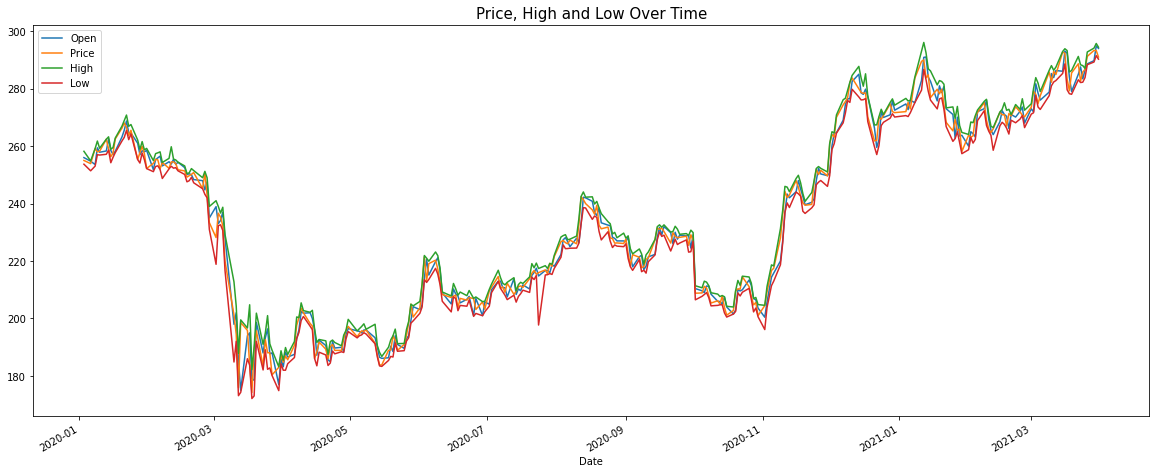

In [20]:
# Line plot of the Price, High and Low variables in sberbank
sberbank_df[['Open','Price','High','Low']].plot()
plt.title('Price, High and Low Over Time', size=15)
plt.show()

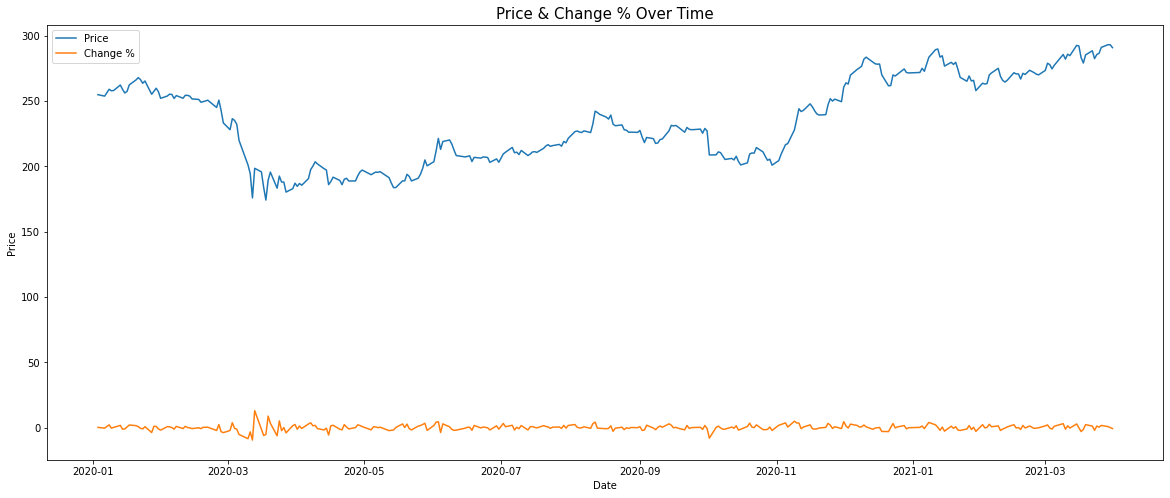

In [21]:
# Line plot of the price and change % variables
plt.plot(sberbank_df.index, sberbank_df['Price'], label='Price')
plt.plot(sberbank_df.index, sberbank_df['Change %']*100, label='Change %')
plt.xlabel("Date", size=10)
plt.ylabel("Price", size=10)
plt.title("Price & Change % Over Time", size=15)
plt.legend()
plt.show()

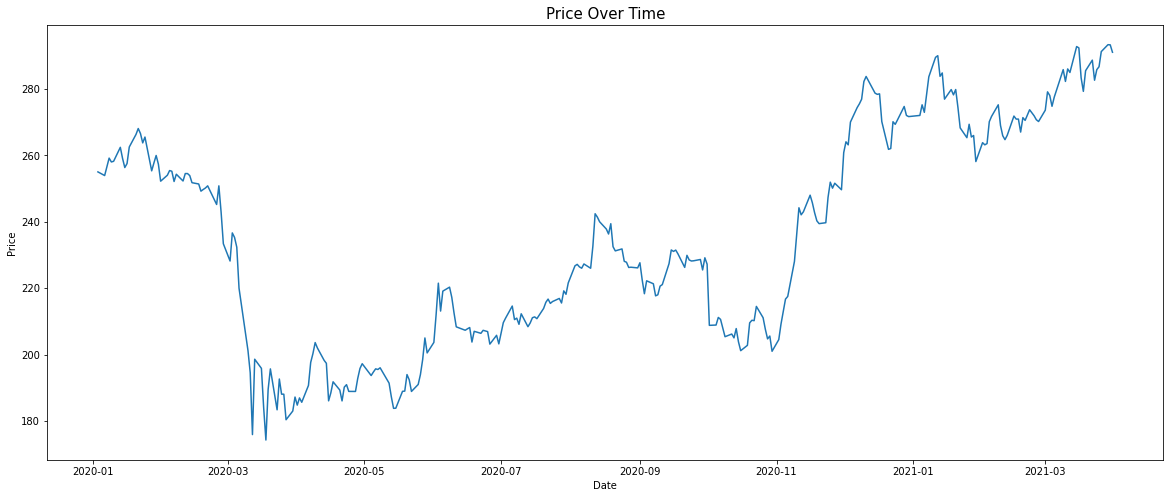

In [22]:
# Line plot of the price variable
plt.plot(sberbank_df['Price'])
plt.xlabel("Date", size=10)
plt.ylabel("Price", size=10)
plt.title("Price Over Time", size=15)
plt.show()

<AxesSubplot:xlabel='Price'>

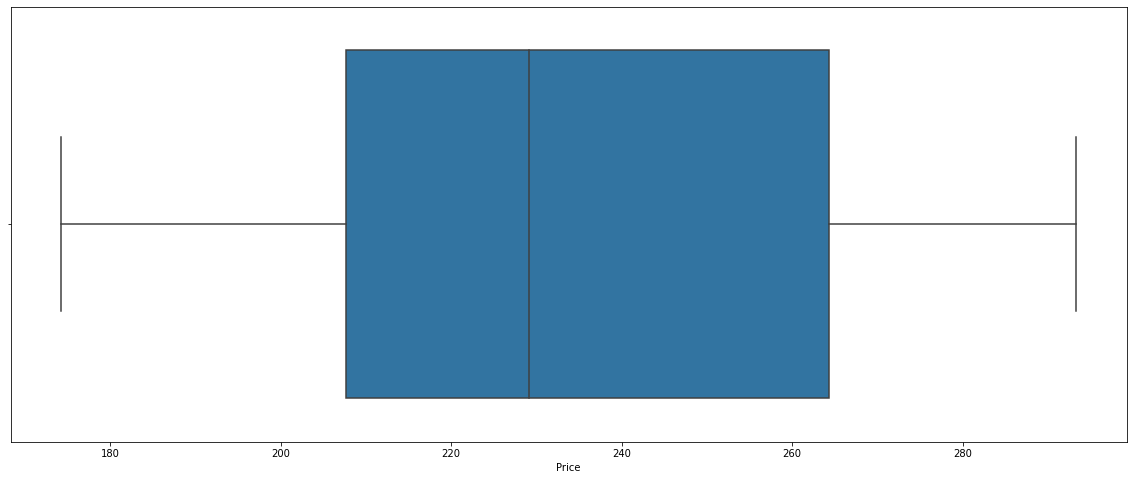

In [23]:
# Box Plot of Price
sns.boxplot(x = sberbank_df['Price'])

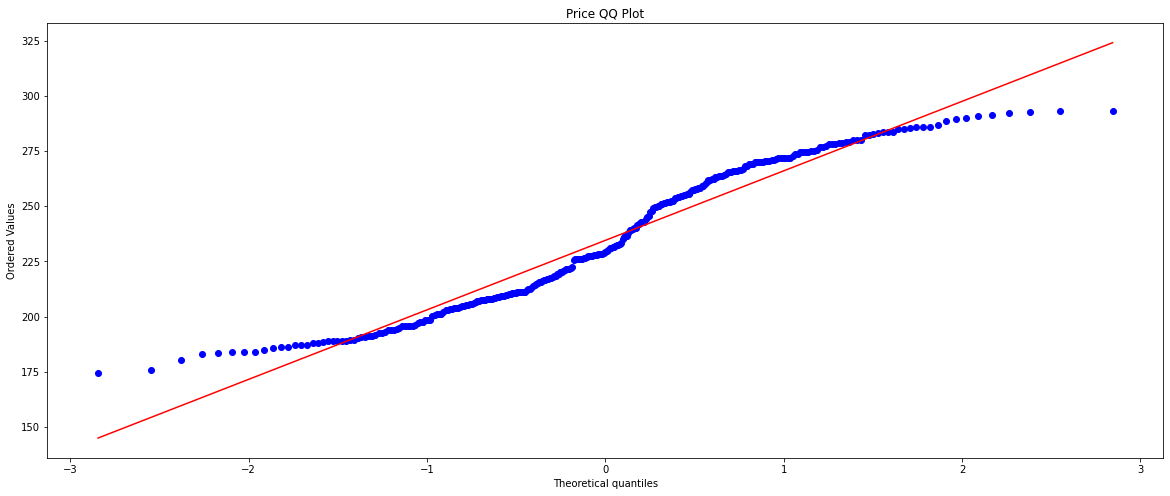

In [24]:
# QQ Plot for the price
stats.probplot(sberbank_df['Price'], plot=pylab)
plt.title("Price QQ Plot")
plt.show()

From the qq-Plot we can see that our data isnt normally distributed. 

### Simple Moving Average

In [25]:
#simple moving average mean
def get_sma(prices, rate):
    return prices.rolling(rate).mean()

def get_sma_std(prices, rate):
    return prices.rolling(rate).std()

In [26]:
sm3 = get_sma(sberbank_df['Price'], 7) # Get 3 day SMA
sm3_std = get_sma_std(sberbank_df['Price'], 7)

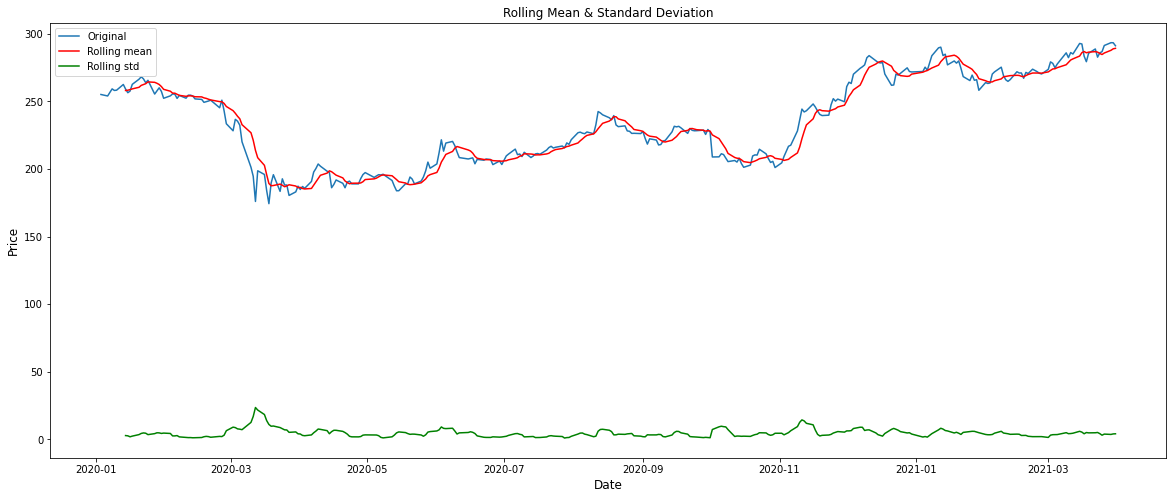

In [27]:
# Plot SMA
plt.plot(sberbank_df['Price'], label='Original')
plt.plot(sm3, color='red', label='Rolling mean')
plt.plot(sm3_std, color='green', label='Rolling std')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.title('Rolling Mean & Standard Deviation')
plt.legend(loc='best')

### Time Series Decomposition

1. Trend - Long term direction
2. Seasonality - Periodic Behaviour
3. Residual - Irregular Fluctations


In [28]:
# setting the time series frequency to business days
sberbank_df = sberbank_df.asfreq("b")

In [29]:
# forward fill missing values
sberbank_df = sberbank_df.fillna(method='ffill')

print(sberbank_df.shape)


(324, 6)


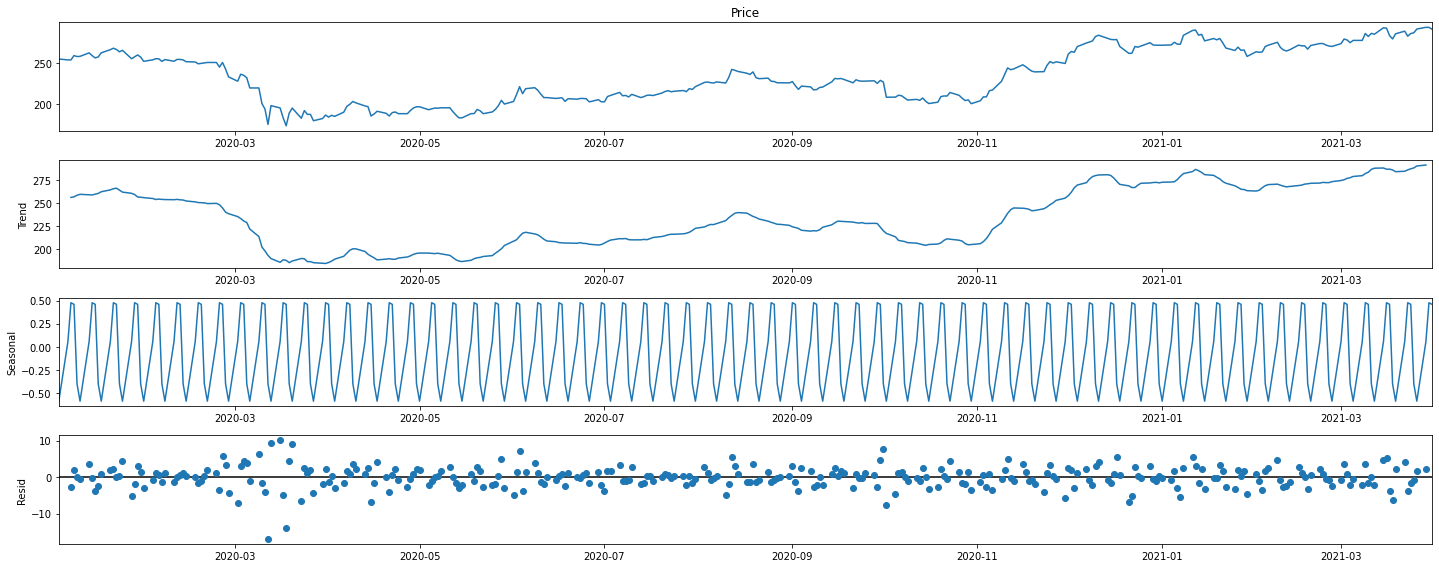

In [30]:
# Applying seasonal decomposition
sberbank_df_decomposed = seasonal_decompose(sberbank_df['Price'], model='additive')

# Plotting the trend, seasonal and residual
sberbank_df_decomposed.plot()
plt.show()

### Stationary Test

Data is stationary when the mean of the series is not a function of time.

We test for stationarity using the Dickey-Fuller test

The null hypothesis for the Dickey-Fuller test is that the time series is not stationary. If the test statistic is less than the critical value and the p-value is lower than alpha (usually 0.05), we reject the null hypothesis and say the series is stationary.

In [31]:
# This function makes the time series stationary.

def stationary(df):
    # ADF Test to fins the p-value
    result = adfuller(df.Price.values, autolag='AIC')
    if result[1] > 0.05:
        print('ADF for the original price values')
        dfoutput = pd.Series(
            result[0:4],
            index=[
                "Test Statistic",
                "p-value",
                "Lags Used",
                "Number of Observations Used",
            ],
        )
        for key, value in result[4].items():
            dfoutput["Critical Value (%s)" % key] = value
        print(dfoutput)
        
        result = adfuller(np.diff(df.Price.values), autolag='AIC')
        
    if result[1] < 0.05:
        print('\n ADF for the price values after difference:')
        dfoutput = pd.Series(
            result[0:4],
            index=[
                "Test Statistic",
                "p-value",
                "Lags Used",
                "Number of Observations Used",
            ],
        )
        for key, value in result[4].items():
            dfoutput["Critical Value (%s)" % key] = value
        print(dfoutput)
        difference = df.Price.diff()
        df['difference'] = difference
    else:
        print('Your time series is not stationary, you may need to make another difference')
    return df

In [32]:
stationary(sberbank_df)

ADF for the original price values
Test Statistic                  -1.042472
p-value                          0.737460
Lags Used                        4.000000
Number of Observations Used    319.000000
Critical Value (1%)             -3.451017
Critical Value (5%)             -2.870643
Critical Value (10%)            -2.571620
dtype: float64

 ADF for the price values after difference:
Test Statistic                -7.482622e+00
p-value                        4.728430e-11
Lags Used                      3.000000e+00
Number of Observations Used    3.190000e+02
Critical Value (1%)           -3.451017e+00
Critical Value (5%)           -2.870643e+00
Critical Value (10%)          -2.571620e+00
dtype: float64


,Price,Open,High,Low,Volume,Change %,difference
Date,,,,,,,
2020-01-03,255.00,255.99,258.19,253.70,35.85,0.0010,NaN
2020-01-06,253.90,254.75,254.84,251.40,22.35,-0.0043,-1.10
2020-01-07,253.90,254.75,254.84,251.40,22.35,-0.0043,0.00
2020-01-08,259.15,253.57,259.15,253.03,40.82,0.0207,5.25
2020-01-09,257.99,259.40,261.76,257.01,38.33,-0.0045,-1.16
...,...,...,...,...,...,...,...
2021-03-25,286.66,286.50,287.03,283.85,35.22,0.0030,0.87
2021-03-26,291.22,288.63,292.75,288.32,56.07,0.0159,4.56
2021-03-29,293.30,289.72,294.09,289.26,43.68,0.0071,2.08


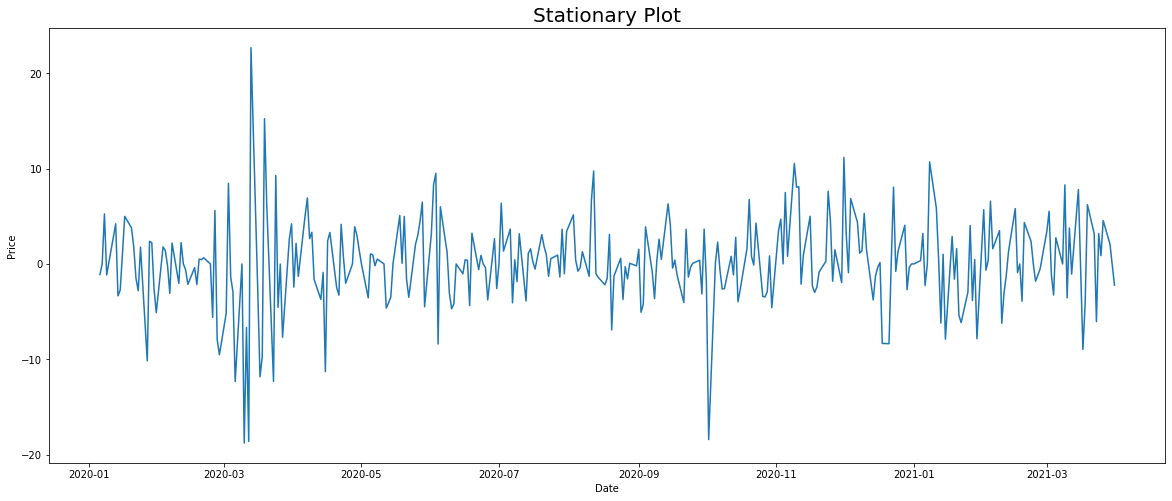

In [33]:
# Line plot of the stationary variable
plt.plot(sberbank_df.index, sberbank_df['difference'])
plt.xlabel("Date", size=10)
plt.ylabel("Price", size=10)
plt.title("Stationary Plot", size=20)
plt.show()

In [34]:
sberbank_df.dropna(inplace=True)
sberbank_df.head()

,Price,Open,High,Low,Volume,Change %,difference
Date,,,,,,,
2020-01-06,253.90,254.75,254.84,251.40,22.35,-0.0043,-1.10
2020-01-07,253.90,254.75,254.84,251.40,22.35,-0.0043,0.00
2020-01-08,259.15,253.57,259.15,253.03,40.82,0.0207,5.25
2020-01-09,257.99,259.40,261.76,257.01,38.33,-0.0045,-1.16
2020-01-10,258.19,257.86,259.25,256.88,18.85,0.0008,0.20


### ACF and PACF plot

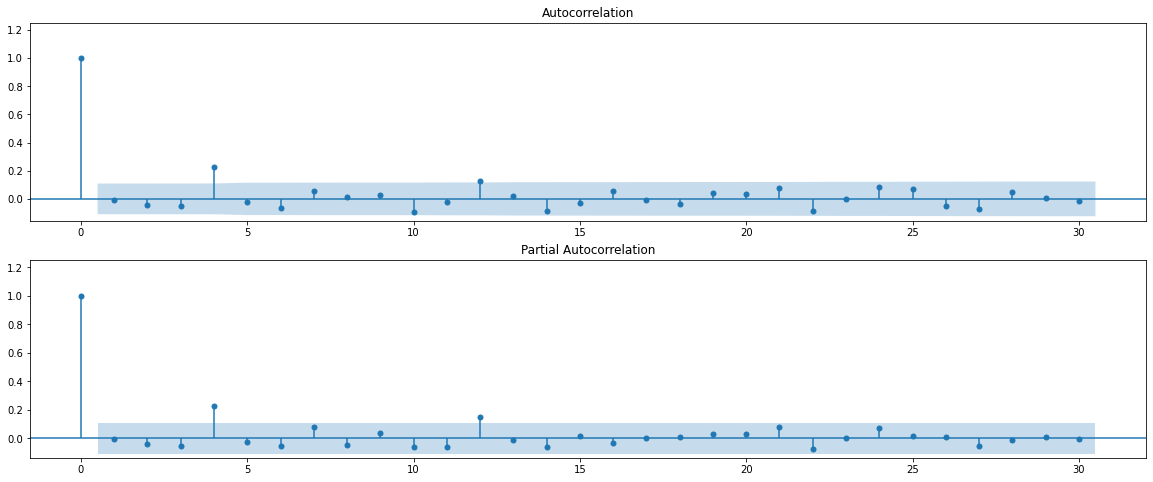

In [35]:
#Autocorrelation plot
fig, ax = plt.subplots(2, 1)
plot_acf(sberbank_df['difference'], lags=30, ax=ax[0], auto_ylims=True)
plot_pacf(sberbank_df['difference'], lags=30, method='ywm', ax=ax[1], auto_ylims=True)
plt.show()

## Training and Testing set Split
In machine learning, train/test split splits the data randomly, as there’s no dependence from one observation to the other. That’s not the case with time series data. Here, you’ll want to use values at the rear of the dataset for testing and everything else for training.

One of the instructions of the project is to use the 2020 data in order to predict with the 2021. So, the train test split will be as follows:

In [36]:
# Training set
sberbank_train = sberbank_df.loc['2020']

# Testing set
sberbank_test = sberbank_df.loc['2021']

# Number of training and testing data points
print("The number of training data points: {} ".format(len(sberbank_train)))
print("The number of testing data points: {} ".format(len(sberbank_test)))

n = sberbank_test.shape[0]

The number of training data points: 259 
The number of testing data points: 64 


## Model Creating and Training

In [37]:
def forecast_accuracy(forecast, actual):
    
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    
    mae = np.mean(np.abs(forecast - actual))    # MAE
    
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    
    return({'Mean Absolute Percentage Error':mape, 'Measure of Absolute Error ': mae, 'Root mean square Error':rmse})

### Moving Average Model

In [38]:
arma_model = arma_model = ARIMA(sberbank_train['Price'], order=(0,0,4))
results = arma_model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                  259
Model:                 ARIMA(0, 0, 4)   Log Likelihood                -886.062
Date:                Sun, 11 Dec 2022   AIC                           1784.123
Time:                        21:29:11   BIC                           1805.464
Sample:                    01-06-2020   HQIC                          1792.704
                         - 12-31-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        224.5165      2.494     90.017      0.000     219.628     229.405
ma.L1          1.4665      0.054     26.928      0.000       1.360       1.573
ma.L2          1.5220      0.089     17.163      0.0

In [39]:
# prediction date
start_date = sberbank_test.index.min()
end_date   = sberbank_test.index.max()

# prediction and confidence interval using the model
sberbank_forecast0 = results.predict(start=start_date, end=end_date)

Text(0.5, 1.0, 'Train, Test and Predicted data points using ARIMA')

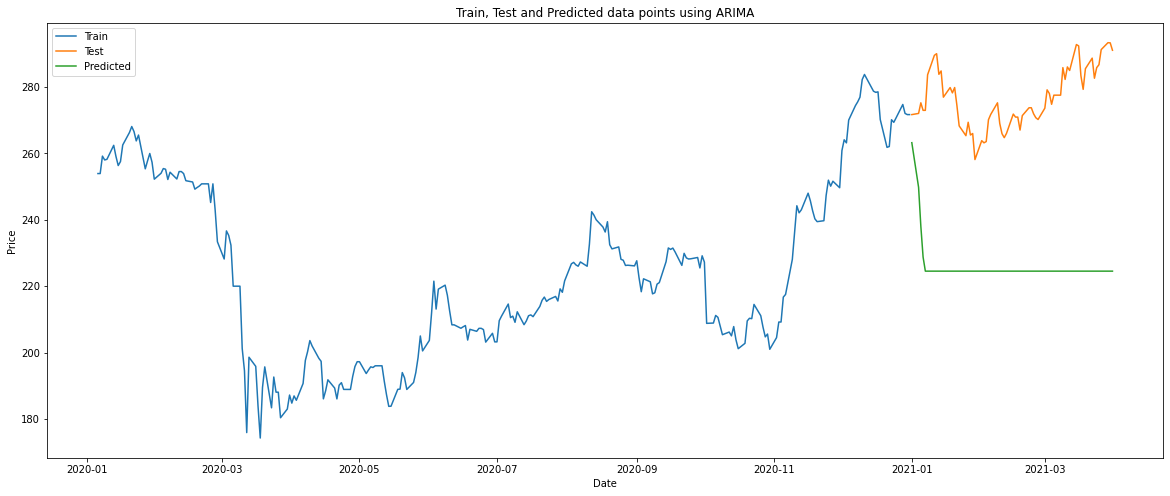

In [40]:
#Data Plot
plt.plot(sberbank_train['Price'], label='Train')
plt.plot(sberbank_test['Price'], label='Test')
plt.plot(sberbank_forecast0, label='Predicted')
plt.xlabel("Date", size=10)
plt.ylabel("Price", size=10)
plt.legend()
plt.title('Train, Test and Predicted data points using ARIMA')

In [41]:
forecast_accuracy(sberbank_forecast0,sberbank_test.Price)

{'Mean Absolute Percentage Error': 0.18304511959732717,
 'Measure of Absolute Error ': 50.89750908784828,
 'Root mean square Error': 52.10884971031416}

### ARIMA

In [42]:
#from pyramid.arima import auto_arima
arima_model = pm.auto_arima(sberbank_train['Price'], start_p=1, start_q=1, test='adf', max_p=6, max_q=6, 
                      m=1, d=None, seasonal=False, start_P=0, D=1, trace=True, error_action='ignore',  
                      suppress_warnings=True, stepwise=False)
print(arima_model.aic())

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1544.479, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1546.479, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1548.212, Time=0.12 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=1550.199, Time=0.08 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=1534.932, Time=0.05 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=1535.818, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1546.479, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1548.471, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1550.212, Time=0.05 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1547.257, Time=0.05 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=1536.219, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1548.085, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1550.085, Time=0.04 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1538.568, Time=0.08 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=1538.183, Time=0.08 sec
 ARIMA(3,1

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  259
Model:               SARIMAX(0, 1, 4)   Log Likelihood                -761.466
Date:                Sun, 11 Dec 2022   AIC                           1534.932
Time:                        21:29:12   BIC                           1556.250
Sample:                    01-06-2020   HQIC                          1543.504
                         - 12-31-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0710      0.386      0.184      0.854      -0.685       0.827
ma.L1          0.0417      0.062      0.675      0.500      -0.079       0.163
ma.L2         -0.0127      0.041     -0.307      0.7

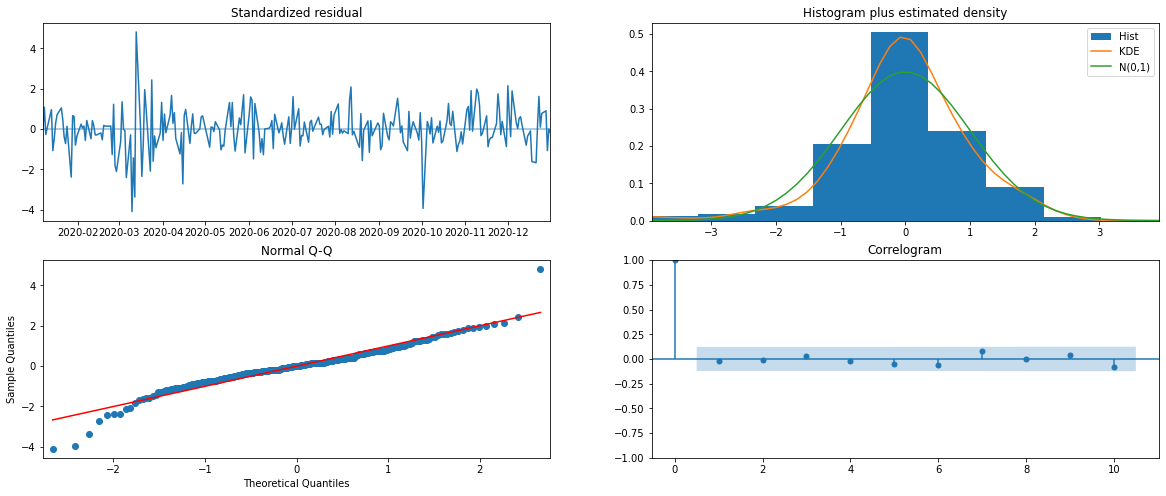

In [43]:
# model summary
print(arima_model.summary())

# diagnostic plots of best model
arima_model.plot_diagnostics()
plt.show()

In [44]:
# prediction size
n = sberbank_test.shape[0]

# prediction and confidence interval using the model
sberbank_forecast = arima_model.predict(n_periods=n)

Text(0.5, 1.0, 'Train, Test and Predicted data points using ARIMA')

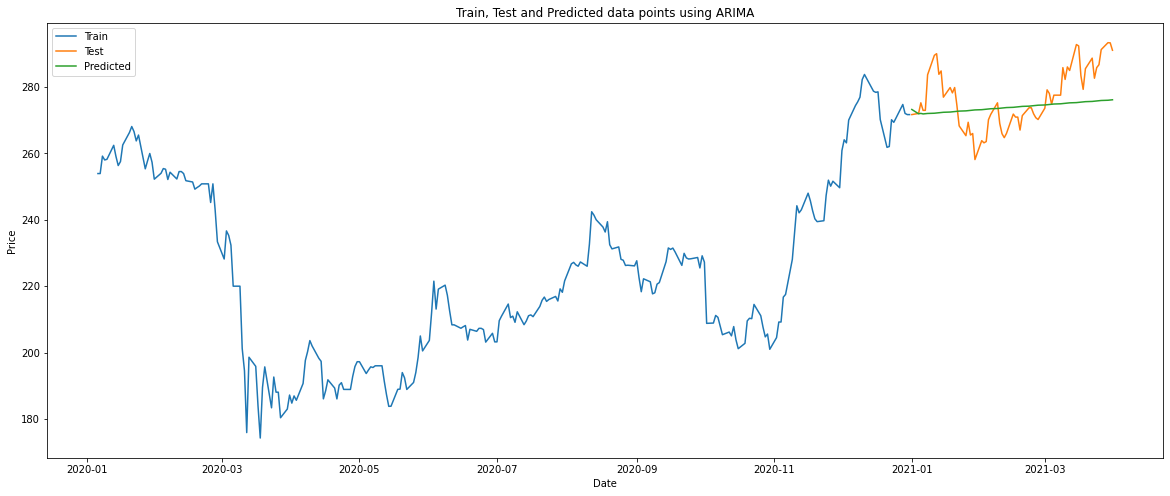

In [45]:
#Data Plot
plt.plot(sberbank_train['Price'], label='Train')
plt.plot(sberbank_test['Price'], label='Test')
plt.plot(sberbank_forecast, label='Predicted')
plt.xlabel("Date", size=10)
plt.ylabel("Price", size=10)
plt.legend()
plt.title('Train, Test and Predicted data points using ARIMA')

In [46]:
forecast_accuracy(sberbank_forecast,sberbank_test.Price)

{'Mean Absolute Percentage Error': 0.02556707089431308,
 'Measure of Absolute Error ': 7.157662651033762,
 'Root mean square Error': 8.812659122032166}

### SARIMA

In [47]:
sarima_model = pm.auto_arima(sberbank_train['Price'], start_p=1, start_q=1, test='adf', max_p=6, max_q=6, 
                  m=1, d=None, seasonal=True, start_P=0, D=1, trace=True, error_action='ignore',  
                  suppress_warnings=True, stepwise=False)
print(sarima_model.aic())

 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=1544.479, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=1546.479, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=1548.212, Time=0.10 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=1550.199, Time=0.09 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=1534.932, Time=0.05 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=1535.818, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=1546.479, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=1548.471, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=1550.212, Time=0.05 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=1547.257, Time=0.05 sec
 ARIMA(1,1,4)(0,0,0)[1] intercept   : AIC=1536.219, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[1] intercept   : AIC=1548.085, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[1] intercept   : AIC=1550.085, Time=0.04 sec
 ARIMA(2,1,2)(0,0,0)[1] intercept   : AIC=1538.568, Time=0.09 sec
 ARIMA(2,1,3)(0,0,0)[1] intercept   : AIC=1538.183, Time=0.08 sec
 ARIMA(3,1

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  259
Model:               SARIMAX(0, 1, 4)   Log Likelihood                -761.466
Date:                Sun, 11 Dec 2022   AIC                           1534.932
Time:                        21:29:13   BIC                           1556.250
Sample:                    01-06-2020   HQIC                          1543.504
                         - 12-31-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0710      0.386      0.184      0.854      -0.685       0.827
ma.L1          0.0417      0.062      0.675      0.500      -0.079       0.163
ma.L2         -0.0127      0.041     -0.307      0.7

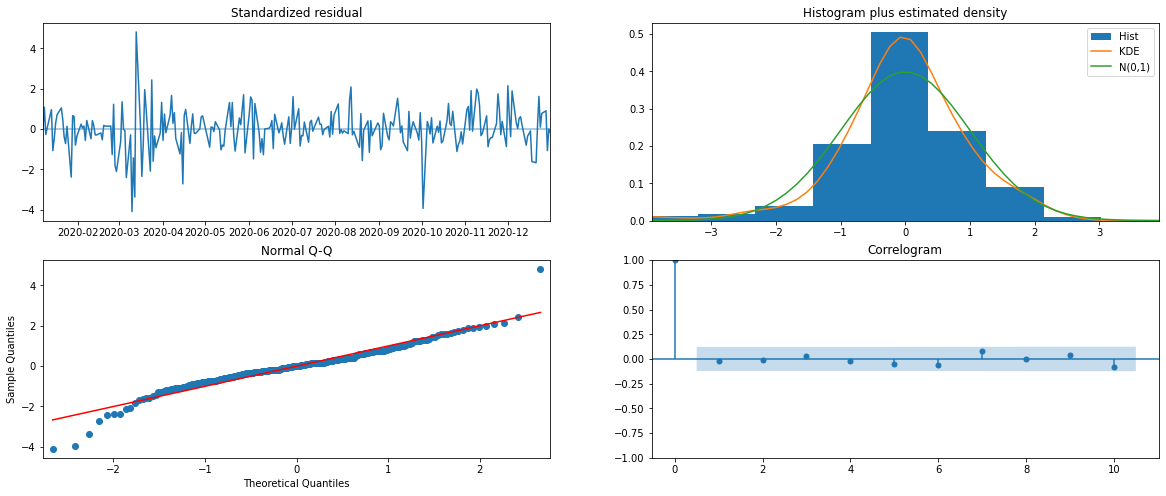

In [48]:
# model summary
print(sarima_model.summary())

# diagnostic plots of best model
sarima_model.plot_diagnostics()
plt.show()

In [49]:
# prediction size
n = sberbank_test.shape[0]

# prediction and confidence interval using the model
sberbank_forecast1 = sarima_model.predict(n_periods=n)

Text(0.5, 1.0, 'Train, Test and Predicted data points using SARIMA')

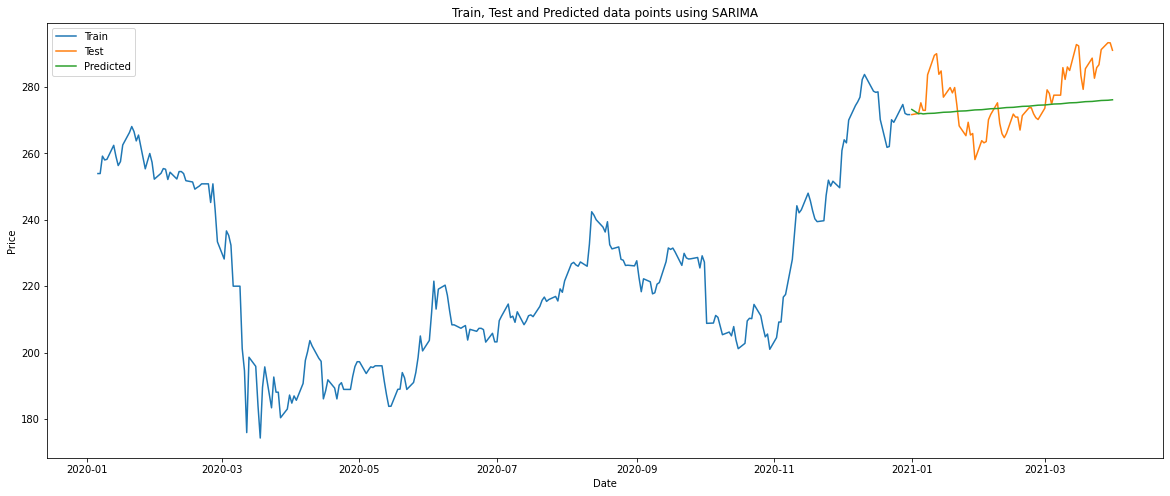

In [50]:
#Data Plot
plt.plot(sberbank_train['Price'], label='Train')
plt.plot(sberbank_test['Price'], label='Test')
plt.plot(sberbank_forecast1, label='Predicted')
plt.xlabel("Date", size=10)
plt.ylabel("Price", size=10)
plt.legend()
plt.title('Train, Test and Predicted data points using SARIMA')

In [51]:
forecast_accuracy(sberbank_forecast1,sberbank_test.Price)

{'Mean Absolute Percentage Error': 0.02556707089431308,
 'Measure of Absolute Error ': 7.157662651033762,
 'Root mean square Error': 8.812659122032166}

### SARIMAX

In [52]:
arimax_model = pm.auto_arima(sberbank_train['Price'], trace=True, error_action="ignore", 
                                 suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1538.568, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1544.479, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1546.479, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1546.479, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1542.532, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1550.212, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1550.085, Time=0.04 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=1537.289, Time=0.09 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1549.083, Time=0.07 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=1538.683, Time=0.08 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=1539.061, Time=0.10 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=1538.183, Time=0.08 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=1538.598, Time=0.05 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=1539.280, Time=0.20 sec
 ARIMA(3,1,2)(0,0,0)[0]          

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  259
Model:               SARIMAX(3, 1, 2)   Log Likelihood                -761.673
Date:                Sun, 11 Dec 2022   AIC                           1535.345
Time:                        21:29:15   BIC                           1556.663
Sample:                    01-06-2020   HQIC                          1543.917
                         - 12-31-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1121      0.111    -10.042      0.000      -1.329      -0.895
ar.L2         -0.8214      0.108     -7.579      0.000      -1.034      -0.609
ar.L3         -0.1542      0.042     -3.640      0.0

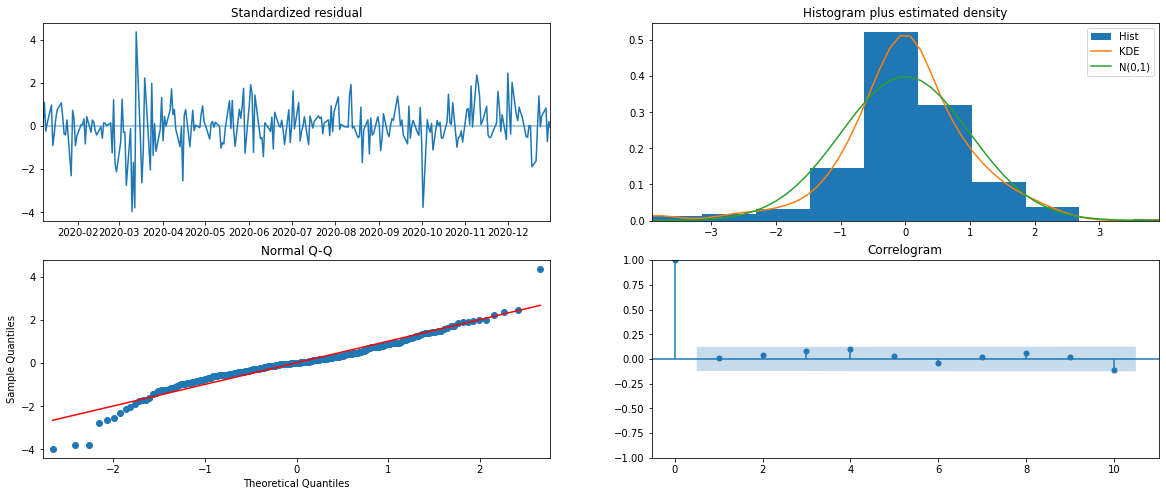

In [53]:
# model summary
print(arimax_model.summary())

# diagnostic plots of best model
arimax_model.plot_diagnostics()
plt.show()

In [54]:
# prediction size
n = sberbank_test.shape[0]

# prediction and confidence interval using the model
sberbank_forecast2 = arimax_model.predict(n_periods=n)

Text(0.5, 1.0, 'Train, Test and Predicted data points using SARIMAX')

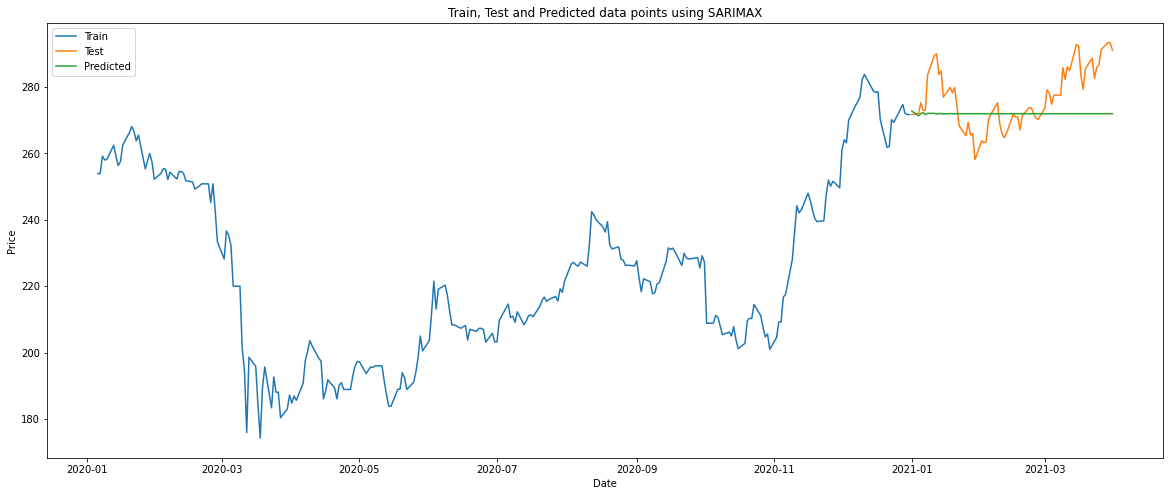

In [55]:
#Data Plot
plt.plot(sberbank_train['Price'], label='Train')
plt.plot(sberbank_test['Price'], label='Test')
plt.plot(sberbank_forecast2, label='Predicted')
plt.xlabel("Date", size=10)
plt.ylabel("Price", size=10)
plt.legend()
plt.title('Train, Test and Predicted data points using SARIMAX')

In [56]:
forecast_accuracy(sberbank_forecast2,sberbank_test.Price)

{'Mean Absolute Percentage Error': 0.028032341537114164,
 'Measure of Absolute Error ': 7.894685604480816,
 'Root mean square Error': 10.086651889973977}

## Holt-Winter Model

In [57]:
# Set the value of Alpha and define x as the time period
x = 12
alpha = 1/(2*x)

<AxesSubplot:title={'center':'Holt Winters Single Exponential Smoothing graph'}, xlabel='Date'>

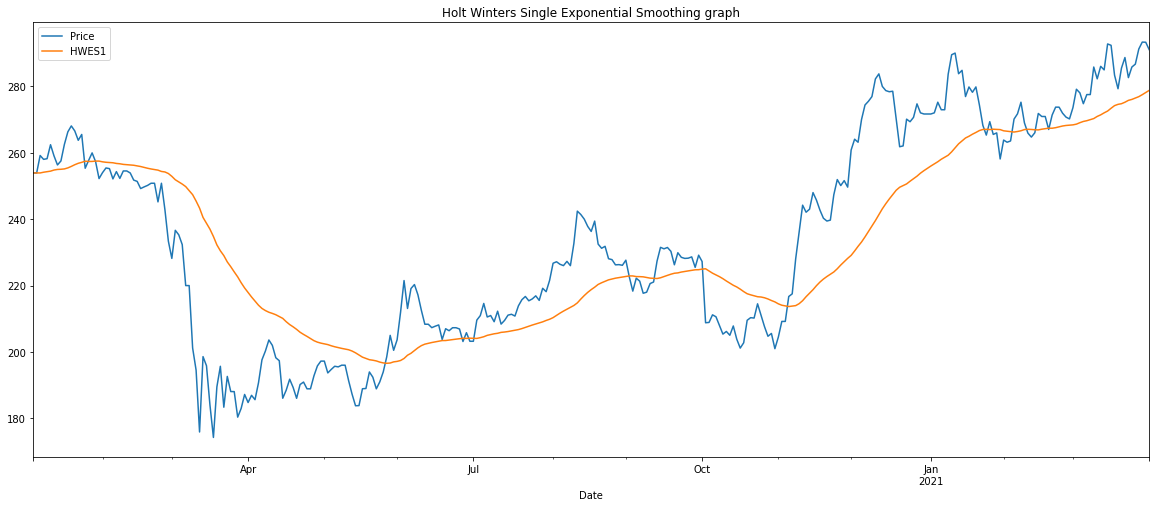

In [58]:
# Single exponential smoothing of the visitors data set
sberbank_df['HWES1'] = SimpleExpSmoothing(sberbank_df['Price']).fit(smoothing_level=alpha,optimized=False,use_brute=True).fittedvalues      
sberbank_df[['Price','HWES1']].plot(title='Holt Winters Single Exponential Smoothing graph')


In [59]:
sberbank_df.head()

,Price,Open,High,Low,Volume,Change %,difference,HWES1
Date,,,,,,,,
2020-01-06,253.90,254.75,254.84,251.40,22.35,-0.0043,-1.10,253.900000
2020-01-07,253.90,254.75,254.84,251.40,22.35,-0.0043,0.00,253.900000
2020-01-08,259.15,253.57,259.15,253.03,40.82,0.0207,5.25,253.900000
2020-01-09,257.99,259.40,261.76,257.01,38.33,-0.0045,-1.16,254.118750
2020-01-10,258.19,257.86,259.25,256.88,18.85,0.0008,0.20,254.280052


<AxesSubplot:title={'center':'Holt Winters graph: Additive Trend and Multiplicative Trend'}, xlabel='Date'>

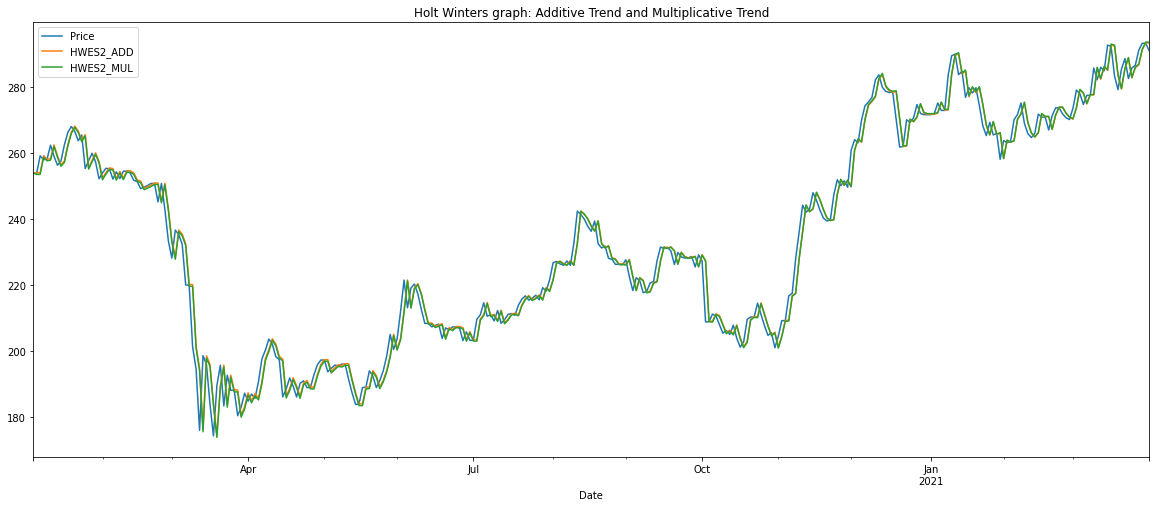

In [60]:
# Double exponential smoothing of visitors data set ( Additive and multiplicative)
sberbank_df['HWES2_ADD'] = ExponentialSmoothing(sberbank_df['Price'],trend='add').fit().fittedvalues
sberbank_df['HWES2_MUL'] = ExponentialSmoothing(sberbank_df['Price'],trend='mul').fit().fittedvalues
sberbank_df[['Price','HWES2_ADD','HWES2_MUL']].plot(title='Holt Winters graph: Additive Trend and Multiplicative Trend')


In [61]:
# Fit the model
fitted_model = ExponentialSmoothing(sberbank_train['Price'],trend='mul',seasonal='mul',seasonal_periods=7).fit()
print(fitted_model.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    Price   No. Observations:                  259
Model:             ExponentialSmoothing   SSE                           5866.328
Optimized:                         True   AIC                            830.120
Trend:                   Multiplicative   BIC                            869.246
Seasonal:                Multiplicative   AICC                           831.606
Seasonal Periods:                     7   Date:                 Sun, 11 Dec 2022
Box-Cox:                          False   Time:                         21:29:16
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.9974000                alpha                 True
smoothing_trend          

Text(0.5, 1.0, 'Train, Test and Predicted data points using Holt Winters Exponential Smoothing')

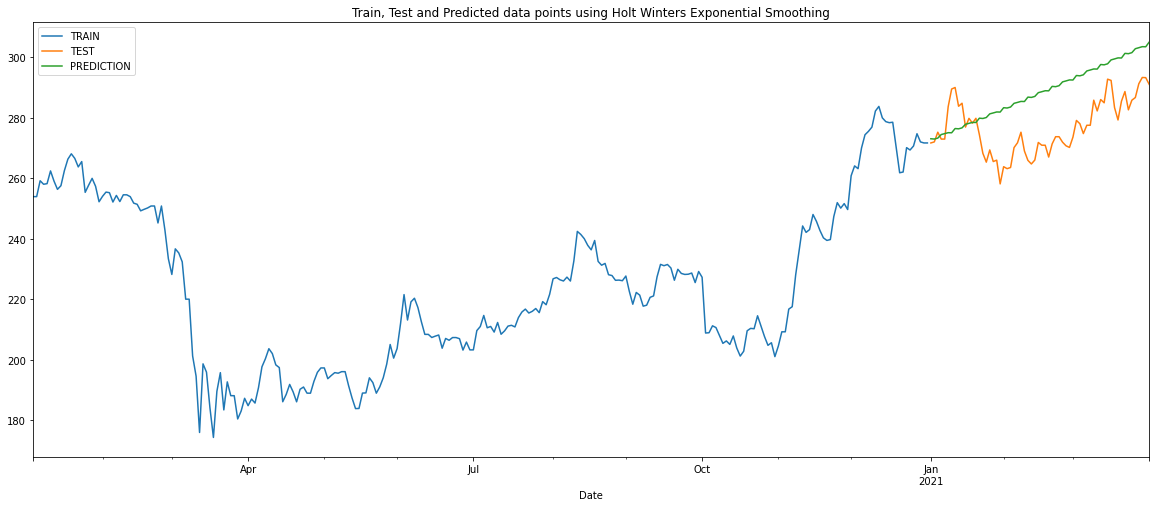

In [62]:
#Prediction
test_predictions = fitted_model.forecast(n)

#Data Plot
sberbank_train['Price'].plot(legend=True,label='TRAIN')
sberbank_test['Price'].plot(legend=True,label='TEST')
test_predictions.plot(legend=True,label='PREDICTION')
plt.title('Train, Test and Predicted data points using Holt Winters Exponential Smoothing')

In [63]:
forecast_accuracy(test_predictions,sberbank_test.Price)

{'Mean Absolute Percentage Error': 0.04875602543667523,
 'Measure of Absolute Error ': 13.397048484401264,
 'Root mean square Error': 14.86760819410977}

### Facebook Prophet

In [64]:
#Create dataframe for prophet
prophet_df = sberbank_df['Price']

prophet_df = prophet_df.rename_axis('ds').reset_index()
prophet_df = prophet_df.rename(columns={'Price':'y'})

In [65]:
#Training and Testing split
train = prophet_df[prophet_df.ds.astype(str).str.contains("2020")]
test = prophet_df[prophet_df.ds.astype(str).str.contains('2021')]

train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

In [66]:
fb_model = Prophet(interval_width=0.95,daily_seasonality = True).fit(train)

forecast = fb_model.predict(test[['ds']])

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Initial log joint probability = -5.53094
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        632.46     0.0173164       313.203      0.3724           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     182       651.423   0.000183471       114.716   9.643e-07       0.001      266  LS failed, Hessian reset 
     199       651.703    0.00018811       66.3922      0.8966      0.8966      287   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       655.578    0.00276194        96.187       0.978       0.978      419   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     306       655.724   0.000120601       84.6283   1.134e-06       0.001      462  LS failed, Hessian reset 
     399       657.047   0.000645616       117.435      0.2256           1      576   
    Iter      log pro

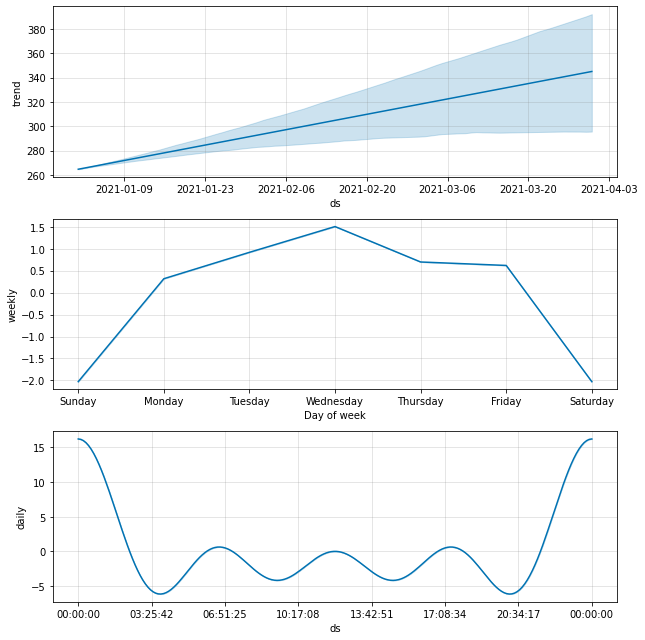

In [67]:
# Facebook prophet plot components
fb_model.plot_components(forecast)
plt.show()

Text(0.5, 1.0, 'Train, Test and Predicted data points using Facebook Prophet')

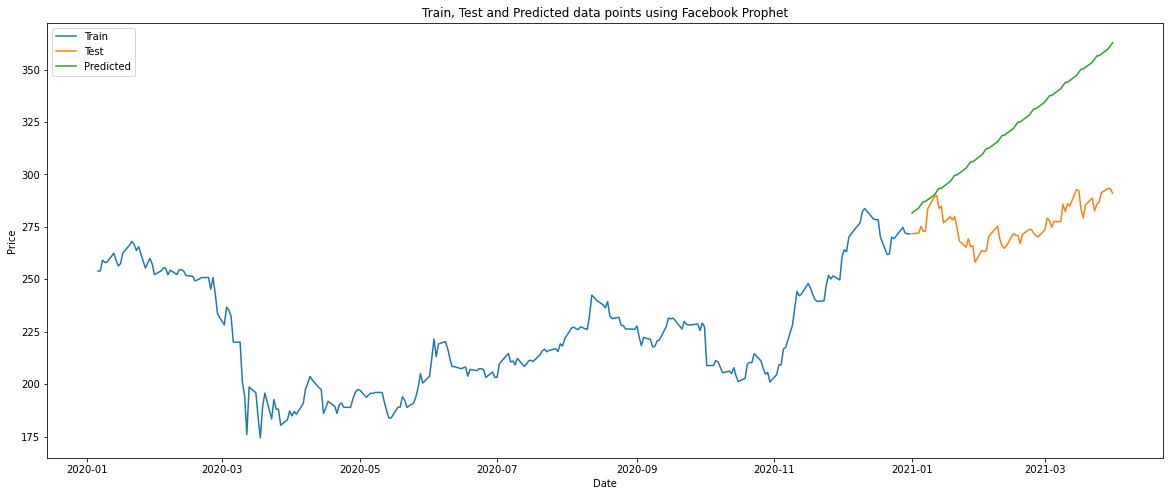

In [68]:
#Data Plot
plt.plot(train['ds'], train['y'], label='Train')
plt.plot(test['ds'], test['y'], label='Test')
plt.plot(forecast['ds'], forecast['yhat'], label='Predicted')
plt.xlabel("Date", size=10)
plt.ylabel("Price", size=10)
plt.legend()
plt.title('Train, Test and Predicted data points using Facebook Prophet')

In [69]:
# Facebook Prophet accuracy metric
forecast_accuracy(forecast.yhat, test.y)

{'Mean Absolute Percentage Error': 0.1647685138032804,
 'Measure of Absolute Error ': 45.61012476414043,
 'Root mean square Error': 50.08305146496255}

## Bollinger bands

Bollinger bands are a type of technical indicator that allows traders to analyze the volatility of a stock and whether the price is high or low on a relative basis. The top band is typically two standard deviations above the SMA and the bottom band is typically two standard deviations below the SMA.
The Bollinger bands borders the price of stocks, You can identify buy signals when the price line hits the lower band and sell signals when the price line hits the higher band.

In [70]:
# Bollinger band

def get_bollinger_bands(prices, rate=7):
    sma = get_sma(prices, rate)
    std = prices.rolling(rate).std()
    bollinger_up = sma + std * 2 # Calculate top band
    bollinger_down = sma - std * 2 # Calculate bottom band
    return bollinger_up, bollinger_down

In [71]:
bollinger_up, bollinger_down = get_bollinger_bands(price['Price'])

NameError: name 'price' is not defined

In [ ]:
plt.plot(price['Price'], label='Closing Prices')
plt.plot(bollinger_up, label='Bollinger Up', c='g')
plt.plot(bollinger_down, label='Bollinger Down', c='r')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Closing Prices')
plt.title(' Bollinger Bands')
plt.legend(loc='best')